<font color='#315aa0'>**Data Sets**</font>
---

## Índice

1. **Configuraciones**
   * Importación de librerías
   * Paths
   * Paletas de colores
2. **Exploración inicial**
   * Dataset Churn Bank
   * Dataset PaySim
3. **Manipulación de datos**
   * Churn
     - Fechas
     - Clusters Iniciales
     - Clusters K-Means
     - Interpretación Clusters K-Means
   * PaySim
     - Clasificación de transacciones
     - Asignación de transacciones
     - Limpieza datasets
     - Escalado del monto de las transacciones
4. **Salud del Dataset - Exploración**
   * Chequeos generales
   * Distribuciones numéricas
   * Churn
   * Correlación

# <font color='#315aa0'>**Cofiguraciones**</font>

## <font color='#c37171'>**Importación de librerías**</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import kagglehub

import os
from pathlib import Path
from typing import Tuple, Callable, List

import warnings

warnings.filterwarnings('ignore')

## <font color='#c37171'>**Paths**</font>

In [2]:
# Obtiene el path actual
PROJECT_PATH = os.getcwd()

src = Path('src')
DATA_PATH = PROJECT_PATH / src

img = Path('img')
IMG_PATH = PROJECT_PATH / img

models = Path('models')
MODELS_PATH = PROJECT_PATH / models

reports = Path('reports')
REPORTS_PATH = PROJECT_PATH / reports

dirs = [DATA_PATH, IMG_PATH, MODELS_PATH, REPORTS_PATH]


for directory in dirs:
    if not directory.exists():
        directory.mkdir(parents=True)
        print(f'Directorio creado:\n{directory}\n')
    else:
        print(f'El directorio ya existe:\n{directory}\n')

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\Fintech_NC\src

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\Fintech_NC\img

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\Fintech_NC\models

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\Fintech_NC\reports



## <font color='#c37171'>**Paleta de Colores del Proyecto**</font>


**Bordós / Rojos**

<span style="display:inline-block; width:20px; height:20px; background:#620c0c; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#8b1f1f; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#a14b4b; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#c37171; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#e29c9c; margin-right:5px;"></span>

**Grises / Neutros**

<span style="display:inline-block; width:20px; height:20px; background:#5a5858; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#8c8a8a; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#b0aeae; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#d3d1d1; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#eae7e6; margin-right:5px;"></span>

**Azules**

<span style="display:inline-block; width:20px; height:20px; background:#0d1b3d; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#152a55; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#1e3a6c; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#274a84; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#315aa0; margin-right:5px;"></span>

**Cremas / Mostazas**

<span style="display:inline-block; width:20px; height:20px; background:#FCB53B; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#FDB860; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#FDC584; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#FDD2A9; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#FDE0CE; margin-right:5px;"></span>

In [3]:
BORDO_1, BORDO_2, BORDO_3, BORDO_4, BORDO_5 = '#620c0c', '#8b1f1f', '#a14b4b', '#c37171', '#e29c9c' 
GRIS_1, GRIS_2, GRIS_3, GRIS_4, GRIS_5 = '#5a5858', '#8c8a8a', '#b0aeae', '#d3d1d1', '#eae7e6' 
AZUL_1, AZUL_2, AZUL_3, AZUL_4, AZUL_5 = '#0d1b3d', '#152a55', '#1e3a6c', '#274a84', '#315aa0' 
CREMA_1, CREMA_2, CREMA_3, CREMA_4, CREMA_5 = '#FCB53B', '#FDB860', '#FDC584', '#FDD2A9', '#FDE0CE'

# <font color='#315aa0'>**Exploración inicial**</font>

## <font color='#c37171'>**Dataset Churn Bank**</font>

In [4]:
df_churn = pd.read_csv(DATA_PATH/'churn.csv')
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df_churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df_churn['Exited'].sum()

2037

In [8]:
df_churn['Exited'].value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [9]:
df_churn['CustomerId'].nunique()

10000

## <font color='#c37171'>**Dataset PaySim**</font>

In [10]:
path_paysim = kagglehub.dataset_download('ealaxi/paysim1')

print('Path to dataset PaySim:', path_paysim)

Path to dataset PaySim: C:\Users\Ignacio\.cache\kagglehub\datasets\ealaxi\paysim1\versions\2


In [11]:
paysim_file = Path('PS_20174392719_1491204439457_log.csv')
df_paysim = pd.read_csv(path_paysim / paysim_file)
df_paysim.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [12]:
df_paysim.shape

(6362620, 11)

In [13]:
df_paysim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [14]:
df_paysim.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [15]:
df_paysim.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [16]:
df_paysim['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [17]:
df_paysim['type'].value_counts(normalize=True)

type
CASH_OUT    0.351663
PAYMENT     0.338146
CASH_IN     0.219923
TRANSFER    0.083756
DEBIT       0.006512
Name: proportion, dtype: float64

In [18]:
df_paysim['amount'].max()

92445516.64

In [19]:
df_churn['EstimatedSalary'].max()

199992.48

In [20]:
len(df_paysim) / df_churn['CustomerId'].nunique()

636.262

## <font color='#FCB53B'>**Observaciones iniciales**</font>

### <font color='#c37171'>**DataFrame PaySim (Simluación Transacciones Bancarias)**</font>

* **Cantidad transacciones:** 6 362 620

* **Max Transaction amount:** 92 445 516.64

### <font color='#c37171'>**DataFrame Churn**</font>

* **Clientes unicos:** 10 000
  
* **Clientes Churn = Yes:** 2037 *(20% aprox)*

* **Max balance**: 250 898.09
* **Max estimated salary**: 199 992.48

### **Problemas iniciales**

El primer problema surge por supuesto porque los Ids no son los mismos, ya que no corresponden al mismo dataset. Uno cuenta con 10000 ids unicos (df_churn), el otro cuenta con 6353307 ids unicos (casi la misma cantidad de transacciones).

Otro problema que surge es que los montos son muy distintos entre ambos datasets. Se puede ver en el monto maximo de transaccion de PaySim y el balance maximo de Churn Otra cosa es que el step es de una hora, cuenta con 743 (correspondiente a un mes) cuando el tenure en el df_churn está medido en años, esto habrá que modificarlo de alguna manera.
<br>
### **Ideas iniciales**
<br>

> **TRANSACCIONES**

* Quedarme con todas las transacciones. Pero como el objetivo del problema es churn, no me interesan varias columnas. 

Consevaría:

**step:** lo transformaría en fechas en un rango quizás de 2 años ya que hay 743 steps<br>
**type:** tipo de transacciones<br>
**amount:** necesita ser reescalado, y las transacciones no pueden ser nunca mayores al saldo de la cuenta<br>
**nameOrig:** reemplazar por IDs de df_churn<br>

Estas dos no estoy seguro todavía:

**oldbalanceOrg**<br>
**newbalanceOrig**

<br>

> **IDs**

* Utilizar los IDs de **df_churn**, y buscar la manera de asignarlos de manera aleatoria a las transacciones. Esto deberá seguir cierta lógica ya que los clientes que se fueron no deberían tener transacciones en los últimos X meses.
Esto deberá respetar una logica donde se agrupen los clientes que tienen `Exited = 1` y que vaya variando, debe haber clientes con distintas fechas de abandono, entre 6 y 0 meses.

# <font color='#315aa0'>**Manipulación de datos**</font>

## 🔑 <font color='#c37171'>**Principios para evitar “dataset basura”**</font>
---

### 1. Definir hipótesis de negocio realistas

Antes de tocar los datos, escribir supuestos que tengan sentido en un banco real:

- Clientes con menos interacciones en la app = más probabilidad de churn.
- Disminución en frecuencia de transacciones en los últimos meses = mayor riesgo de churn.
- Edad y salario influyen en la estabilidad del cliente (jóvenes y bajos salarios = más churn).
- Factores externos como inflación alta → más churn en clientes de bajo ingreso.

> 👉 Esto asegura que los patrones que generes no sean aleatorios, sino consistentes con lo que podría pasar en la realidad.

---

### 2. Usar correlaciones en lugar de ruido puro
En lugar de asignar variables externas o de interacción al azar:

- Introducir variables que estén correlacionadas con churn de forma controlada.

**Ejemplo:**
- Clientes que hicieron churn tienen un 40% menos de interacciones con la app en los últimos 3 meses.
- Clientes de churn tienen un 20% más de transacciones fallidas o rechazadas.
- Factores externos (ej: inflación simulada) afectan más a clientes con Balance < X.

> 👉 Esto genera señales diferenciales para el modelo.

---

### 3. Introducir variabilidad dentro de cada grupo

No todos los clientes que hicieron churn deben tener baja actividad. Introducir distribuciones:

- 60% de churners tienen muy baja interacción.
- 30% tienen actividad media.
- 10% siguen siendo activos hasta el final.

> 👉 Esto evita que el modelo aprenda reglas triviales (del tipo: “si transacciones = 0 → churn”).

---

### 4. Usar ruido controlado (stochastic noise)
Un poco de azar es necesario para que no todo sea determinístico, pero debe ser pequeño en comparación con la señal principal.

**Ejemplo:**  
Número de interacciones promedio de un churner = 20, con desviación estándar de ±5.

---

### 5. Validación manual antes del modelo
Antes de entrenar, explorar el dataset final con gráficos:

- Histograma de transacciones churn vs no churn.
- Interacciones app churn vs no churn.
- Factores externos según balance.

> 👉 Si se ven diferencias razonables entre grupos, entonces el dataset tiene patrones útiles.

---

## 🔧 <font color='#c37171'>**Overview de los 4 datasets**</font>

### 1. Churn (base)
- Target + atributos estáticos.

### 2. Transacciones
- Clientes que hicieron churn deben mostrar una caída de actividad en los últimos meses.
- Clientes que no hicieron churn mantienen o aumentan su actividad.

### 3. Interacciones con la app
- Churners: menor login, menor tiempo en app, menos clicks en productos financieros.
- No churners: más consistencia en el uso.

### 4. Factores externos
- Podés simular inflación, tasa de interés, etc.
- Definí reglas: clientes de menor salario son más sensibles = más probabilidad de churn cuando inflación sube.

## <font color='#c37171'>**Churn**</font>

In [21]:
df_churn_man = df_churn.copy()

### <font color='#FCB53B'>**Fechas**</font>

In [22]:
periods = df_paysim['step'].nunique()
periods

743

In [23]:
end_date = pd.to_datetime('2025-09-30')
end_date

Timestamp('2025-09-30 00:00:00')

In [24]:
start_date = end_date - pd.Timedelta(days=periods-1)
start_date

Timestamp('2023-09-19 00:00:00')

In [25]:
fechas = pd.date_range(start=start_date, periods=periods, freq="D")

print(fechas)

DatetimeIndex(['2023-09-19', '2023-09-20', '2023-09-21', '2023-09-22',
               '2023-09-23', '2023-09-24', '2023-09-25', '2023-09-26',
               '2023-09-27', '2023-09-28',
               ...
               '2025-09-21', '2025-09-22', '2025-09-23', '2025-09-24',
               '2025-09-25', '2025-09-26', '2025-09-27', '2025-09-28',
               '2025-09-29', '2025-09-30'],
              dtype='datetime64[ns]', length=743, freq='D')


In [26]:
enum = [i for i in range(1, 744)]

In [27]:
df_fechas = pd.DataFrame({'step': enum, 'fecha': fechas})
df_fechas

,step,fecha
0,1,2023-09-19
1,2,2023-09-20
2,3,2023-09-21
3,4,2023-09-22
4,5,2023-09-23
...,...,...
738,739,2025-09-26
739,740,2025-09-27
740,741,2025-09-28
741,742,2025-09-29


In [28]:
df_fechas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   step    743 non-null    int64         
 1   fecha   743 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.7 KB


In [29]:
fechas_abandono = fechas[int((len(fechas)/4 * 3)):]
fechas_abandono

DatetimeIndex(['2025-03-29', '2025-03-30', '2025-03-31', '2025-04-01',
               '2025-04-02', '2025-04-03', '2025-04-04', '2025-04-05',
               '2025-04-06', '2025-04-07',
               ...
               '2025-09-21', '2025-09-22', '2025-09-23', '2025-09-24',
               '2025-09-25', '2025-09-26', '2025-09-27', '2025-09-28',
               '2025-09-29', '2025-09-30'],
              dtype='datetime64[ns]', length=186, freq='D')

In [30]:
len(fechas_abandono)

186

In [31]:
import random

abandono_cust = []

for exited in df_churn_man['Exited']:
    if exited == 1:
        if random.random() < 0.75:
            # 75% de churners en los últimos 6 meses
            rand_idx = int(np.random.triangular(0, len(fechas_abandono)-1, len(fechas_abandono)-1))
            abandono_cust.append(fechas_abandono[rand_idx])
        else:
            # 25 % churners en cualquier fecha del período
            abandono_cust.append(random.choice(fechas))
    else:
        abandono_cust.append(np.nan)

In [32]:
df_churn_man['ExitDate'] = abandono_cust

In [33]:
df_churn_man.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,ExitDate
1830,1831,15572467,Chandler,506,France,Male,37,5,0.00,2,1,1,127543.81,0,NaT
4046,4047,15806403,Hu,650,France,Male,37,9,0.00,2,1,0,17974.08,0,NaT
5564,5565,15700083,Lai,609,Spain,Male,39,2,139443.75,2,1,0,9234.06,0,NaT
5721,5722,15643671,Chiekwugo,696,Germany,Male,49,5,97036.22,2,1,0,152450.84,1,2025-07-25
6250,6251,15570895,Ch'in,608,France,Male,42,10,163548.07,1,1,0,38866.85,0,NaT


### <font color='#FCB53B'>**Clusteres iniciales**</font>

Se asignarán scores de acuerdo a distintos aspectos del cliente:

* Tiempo: Edad y Antigüedad
* Riqueza: Balance, Salario Estimado y Puntaje Crediticio
* Compromiso: Número de productos, si Cuenta con Tarjeta de Crédito y si es Miembro Activo

Esto permitirá asignar un puntaje a cada cliente referente a cada aspecto, esto se utilizará luego para realizar una clusterización, y usar los clusters para asignar posteriormente las transacciones e interacciones con la app.

In [34]:
df_clusters = df_churn_man.copy()

In [35]:
df_clusters['cluster_time'] = pd.qcut(df_clusters['Tenure']*0.6 + df_clusters['Age']*0.4, q=3, labels=['Low','Medium','High'])

In [36]:
df_clusters['wealth_score'] = df_clusters['Balance']*0.5 + df_clusters['EstimatedSalary']*0.4 + df_clusters['CreditScore']*0.1
df_clusters['cluster_wealth'] = pd.qcut(df_clusters['wealth_score'], q=3, labels=['Low','Medium','High'])

In [37]:
df_clusters['engagement_score'] = df_clusters['NumOfProducts']*0.5 + df_clusters['HasCrCard']*0.2 + df_clusters['IsActiveMember']*0.3
df_clusters['cluster_engagement'] = pd.qcut(df_clusters['engagement_score'], q=3, labels=['Low','Medium','High'])

In [38]:
df_clusters

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,ExitDate,cluster_time,wealth_score,cluster_wealth,engagement_score,cluster_engagement
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2025-09-29,Medium,40601.452,Low,1.0,Low
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,NaT,Medium,86981.762,Medium,0.8,Low
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2025-09-13,High,125453.228,High,1.7,High
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,NaT,Low,37600.552,Low,1.0,Low
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,NaT,Medium,94474.050,Medium,1.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,NaT,Medium,38585.356,Low,1.2,Medium
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,NaT,High,69416.313,Medium,1.0,Low
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,2025-09-17,Medium,16905.132,Low,0.8,Low
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2025-06-02,Medium,74770.263,Medium,1.2,Medium


### <font color='#FCB53B'>**Clusters K-Means**</font>

In [39]:
# Normalizar los scores para que estén en la misma escala
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_clusters[['wealth_score_norm', 'engagement_score_norm']] = scaler.fit_transform(df_clusters[['wealth_score', 'engagement_score']])

time_mapping = {'Low': 0, 'Medium': 0.5, 'High': 1}
df_clusters['cluster_time_num'] = df_clusters['cluster_time'].map(time_mapping).astype(float)

df_clusters.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Exited,ExitDate,cluster_time,wealth_score,cluster_wealth,engagement_score,cluster_engagement,wealth_score_norm,engagement_score_norm,cluster_time_num
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,1,2025-09-29,Medium,40601.452,Low,1.0,Low,0.220009,0.25,0.5
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,0,NaT,Medium,86981.762,Medium,0.8,Low,0.471943,0.15,0.5
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,1,2025-09-13,High,125453.228,High,1.7,High,0.680918,0.60,1.0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,0,NaT,Low,37600.552,Low,1.0,Low,0.203708,0.25,0.0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,0,NaT,Medium,94474.050,Medium,1.0,Low,0.512641,0.25,0.5


In [40]:
df_clusters.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'ExitDate',
       'cluster_time', 'wealth_score', 'cluster_wealth', 'engagement_score',
       'cluster_engagement', 'wealth_score_norm', 'engagement_score_norm',
       'cluster_time_num'],
      dtype='object')

In [41]:
df_clusters['final_score'] = 0.4*df_clusters['wealth_score_norm'] + 0.4*df_clusters['engagement_score_norm'] + 0.2*df_clusters['cluster_time_num']

In [42]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df_clusters['cluster_final'] = kmeans.fit_predict(df_clusters[['final_score']])

In [43]:
df_clusters

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,cluster_time,wealth_score,cluster_wealth,engagement_score,cluster_engagement,wealth_score_norm,engagement_score_norm,cluster_time_num,final_score,cluster_final
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,Medium,40601.452,Low,1.0,Low,0.220009,0.25,0.5,0.288004,2
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,Medium,86981.762,Medium,0.8,Low,0.471943,0.15,0.5,0.348777,4
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,High,125453.228,High,1.7,High,0.680918,0.60,1.0,0.712367,3
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,Low,37600.552,Low,1.0,Low,0.203708,0.25,0.0,0.181483,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,Medium,94474.050,Medium,1.0,Low,0.512641,0.25,0.5,0.405056,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,...,Medium,38585.356,Low,1.2,Medium,0.209058,0.35,0.5,0.323623,2
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,...,High,69416.313,Medium,1.0,Low,0.376529,0.25,1.0,0.450612,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,...,Medium,16905.132,Low,0.8,Low,0.091292,0.15,0.5,0.196517,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,...,Medium,74770.263,Medium,1.2,Medium,0.405611,0.35,0.5,0.402245,4


### <font color='#FCB53B'>**Interpretación clusters K-Means**</font>

In [44]:
clusters_count = df_clusters['cluster_final'].value_counts()
clusters_count

cluster_final
4    2874
2    2646
0    2230
1    1434
3     816
Name: count, dtype: int64

In [45]:
df_clusters_count = pd.DataFrame({'index':clusters_count.index, 'count': clusters_count})

In [46]:
df_clusters_count

,index,count
cluster_final,,
4,4,2874
2,2,2646
0,0,2230
1,1,1434
3,3,816


In [47]:
centroids_clusters_kmeans = kmeans.cluster_centers_
df_centroides = pd.DataFrame(centroids_clusters_kmeans, columns=['final_score'])
df_centroides.reset_index(inplace=True)

In [48]:
df_centroides

,index,final_score
0,0,0.494466
1,1,0.191013
2,2,0.299533
3,3,0.624389
4,4,0.395506


In [49]:
df_centroides = df_centroides.merge(df_clusters_count, on='index')
df_centroides = df_centroides.rename(columns={'index': 'cluster'})

In [50]:
df_centroides.sort_values('final_score')

,cluster,final_score,count
1,1,0.191013,1434
2,2,0.299533,2646
4,4,0.395506,2874
0,0,0.494466,2230
3,3,0.624389,816


In [51]:
def proporcion_labels(df):
    """
    Esta función tomará un df que debe corresponder a un unico cluster y
    retornará las proporciones de cada etiqueta de los clusters utilizados inicialmente
    """
    
    cluster_labels = ['cluster_time', 'cluster_wealth', 'cluster_engagement']
    counts = {}

    for cluster in cluster_labels:
        counts[cluster] = df[cluster].value_counts(normalize=True)

    return pd.DataFrame(counts)

#### <font color='#FDD2A9'>**Cluster 0**</font>

In [52]:
cluster_0 = df_clusters[df_clusters['cluster_final'] == 0]
prop_cluster_0 = proporcion_labels(cluster_0)
prop_cluster_0

,cluster_time,cluster_wealth,cluster_engagement
Low,0.070852,0.123318,0.503139
Medium,0.311211,0.343049,0.134978
High,0.617937,0.533632,0.361883


#### <font color='#FDD2A9'>**Observaciones Cluster 0:**</font>


Los clientes del **Cluster 0** cuentan con las siguientes características:
* Cuenta con un **score general** de: **0.494466** (2do más alto en el ranking)
* **Cantidad de clientes** pertenencientes al cluster: **2230 clientes**
* *cluster_time:* 60% para clientes con un alto score de tiempo (edad y permanencia) y 30% para término medio.
* *cluster_wealth:* 50% concentrado en clientes con buena salud económica, 35% para término medio.
* *cluster_engagement:* 50% con poco engagement, 35% con alto engagement.

Este es un buen perfil de cliente, ya que son clientes antiguos y con buen poder adquisitivo

#### <font color='#FDD2A9'>**Cluster 1**</font>

In [53]:
cluster_1 = df_clusters[df_clusters['cluster_final'] == 1]
prop_cluster_1 = proporcion_labels(cluster_1)
prop_cluster_1

,cluster_time,cluster_wealth,cluster_engagement
Low,0.82636,0.734310,0.722455
Medium,0.16318,0.243375,0.156206
High,0.01046,0.022315,0.121339


#### <font color='#FDD2A9'>**Observaciones Cluster 1:**</font>

Los clientes del **Cluster 1** cuentan con las siguientes características:

* Cuenta con un **score general** de: **0.191013** (ranking más bajo)
* **Cantidad de clientes** pertenencientes al cluster: **1434 clientes**
* *cluster_time:* 82% para clientes con un bajo score de tiempo (edad y permanencia) y 16% para término medio.
* *cluster_wealth:* 73% concentrado en clientes con baja salud económica, 24% para término medio.
* *cluster_engagement:* 72% con poco engagement, 12% con engagement término medio y 12% con alto engagement.

Este es el perfi de cliente con menor valor para la empresa, son clientes nuevos, de bajo poder adquisitivo, y con poco compromiso

#### <font color='#FDD2A9'>**Cluster 2**</font>

In [54]:
cluster_2 = df_clusters[df_clusters['cluster_final'] == 2]
prop_cluster_2 = proporcion_labels(cluster_2)
prop_cluster_2

,cluster_time,cluster_wealth,cluster_engagement
Low,0.522298,0.432729,0.642857
Medium,0.387755,0.365835,0.167800
High,0.089947,0.201436,0.189342


#### <font color='#FDD2A9'>**Observaciones Cluster 2:**</font>

Los clientes del **Cluster 2** cuentan con las siguientes características:

* Cuenta con un **score general** de: **0.299533**
* **Cantidad de clientes** pertenencientes al cluster: **2646 clientes**
* *cluster_time:* 52% para clientes con un bajo score de tiempo (edad y permanencia) y 38% para término medio.
* *cluster_wealth:* 20% concentrado en clientes con buena salud económica, 36% para término medio, y 43% para baja riqueza.
* *cluster_engagement:* 64% con poco engagement, 16% con engagement término medio y 19% con alto engagement.

Este es el perfi de cliente tiene poco compromiso, pero con potencial para fidelizar, ya que la riqueza esta distribuida de forma relativamente pareja, y son clientes nuevos y/o jovenes.

#### <font color='#FDD2A9'>**Cluster 3**</font>

In [55]:
cluster_3 = df_clusters[df_clusters['cluster_final'] == 3]
prop_cluster_3 = proporcion_labels(cluster_3)
prop_cluster_3

,cluster_time,cluster_wealth,cluster_engagement
Low,0.009804,0.030637,0.215686
Medium,0.151961,0.197304,0.123775
High,0.838235,0.772059,0.660539


#### <font color='#FDD2A9'>**Observaciones Cluster 3:**</font>

Los clientes del **Cluster 3** cuentan con las siguientes características:
	
* Cuenta con un **score general** de: **0.624389** (ranking más alto)
* **Cantidad de clientes** pertenencientes al cluster: **816 clientes** (cluster más pequeño)
* *cluster_time:* 83% para clientes con un alto score de tiempo (edad y permanencia) y 15% para término medio.
* *cluster_wealth:* 77% concentrado en clientes con buena salud económica, 19% para término medio, y 3% para baja riqueza.
* *cluster_engagement:* 66% con alto engagement, 12% con engagement término medio y 21% con bajo engagement.

Este es el perfil de cliente **"VIP"**. Son clientes antiguos y con muy buena salud económica (posiblemente también sean los clientes más adultos). Y con buen nivel de compromiso.

#### <font color='#FDD2A9'>**Cluster 4**</font>

In [56]:
cluster_4 = df_clusters[df_clusters['cluster_final'] == 4]
prop_cluster_4 = proporcion_labels(cluster_4)
prop_cluster_4

,cluster_time,cluster_wealth,cluster_engagement
Low,0.218163,0.290536,0.585247
Medium,0.452679,0.379610,0.153445
High,0.329158,0.329854,0.261308


#### <font color='#FDD2A9'>**Observaciones Cluster 4:**</font>

Los clientes del **Cluster 4** cuentan con las siguientes características:
	
* Cuenta con un **score general** de: **0.395506**
* **Cantidad de clientes** pertenencientes al cluster: **2874 clientes** (cluster más grande)
* *cluster_time:* 32% para clientes con un alto score de tiempo (edad y permanencia) y 45% para término medio y 21% de bajo score de tiempo.
* *cluster_wealth:* 32% de clientes con buena salud económica, 37% para término medio, y 29% para baja riqueza.
* *cluster_engagement:* 26% con alto engagement, 15% con engagement término medio y 58% con bajo engagement.

Este es el perfil de cliente **"Standard"**. Son clientes ni muy antiguos ni muy nuevos, ni muy ricos ni muy pobres, predomina un compromiso bajo.

In [57]:
etiquetas = {0: 'Valioso - Bajo compromiso',
             1: 'Nuevos - Poco Valor',
             2: 'Clientes potenciales',
             3: 'VIP',
             4: 'Standard'}

In [58]:
df_clusters['cluster_label'] = df_clusters['cluster_final'].map(etiquetas)

In [59]:
df_clusters.sample(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,wealth_score,cluster_wealth,engagement_score,cluster_engagement,wealth_score_norm,engagement_score_norm,cluster_time_num,final_score,cluster_final,cluster_label
2341,2342,15735388,Wayn,717,France,Female,25,7,108664.85,2,...,130408.865,High,1.2,Medium,0.707836,0.35,0.0,0.423135,4,Standard
9687,9688,15771997,Bryant,791,France,Female,31,10,75499.24,1,...,46702.376,Low,0.7,Low,0.253149,0.10,0.5,0.241259,1,Nuevos - Poco Valor
8654,8655,15573730,Thompson,586,Germany,Male,42,6,126704.49,2,...,80083.765,Medium,1.2,Medium,0.434474,0.35,1.0,0.513790,0,Valioso - Bajo compromiso
1678,1679,15569178,Kharlamov,570,France,Female,18,4,82767.42,1,...,70165.470,Medium,0.7,Low,0.380599,0.10,0.0,0.192239,1,Nuevos - Poco Valor
2869,2870,15594084,Anderson,524,France,Male,22,9,0.00,2,...,29814.536,Low,1.2,Medium,0.161415,0.35,0.0,0.204566,1,Nuevos - Poco Valor
4897,4898,15723851,Mazzanti,699,Spain,Male,40,2,0.00,1,...,31424.828,Low,0.7,Low,0.170162,0.10,0.5,0.208065,1,Nuevos - Poco Valor
6884,6885,15662571,Maclean,639,France,Male,35,8,0.00,2,...,68257.460,Medium,1.2,Medium,0.370234,0.35,0.5,0.388094,4,Standard
9182,9183,15665579,Cartwright,597,France,Female,28,0,142705.95,1,...,122306.031,High,0.7,Low,0.663822,0.10,0.0,0.305529,2,Clientes potenciales
9886,9887,15719541,Flannagan,675,Spain,Male,31,2,90826.27,2,...,69588.983,Medium,1.2,Medium,0.377467,0.35,0.0,0.290987,2,Clientes potenciales
3841,3842,15750778,Ponomarev,653,France,Female,60,2,120731.39,4,...,115695.039,High,2.5,High,0.627912,1.00,1.0,0.851165,3,VIP


In [60]:
df_churn_labeled = df_clusters.copy()

In [61]:
df_churn_labeled.groupby('cluster_label')['cluster_label'].value_counts()

cluster_label
Clientes potenciales         2646
Nuevos - Poco Valor          1434
Standard                     2874
VIP                           816
Valioso - Bajo compromiso    2230
Name: count, dtype: int64

In [62]:
df_churn_labeled['cluster_label'].value_counts(normalize=True)

cluster_label
Standard                     0.2874
Clientes potenciales         0.2646
Valioso - Bajo compromiso    0.2230
Nuevos - Poco Valor          0.1434
VIP                          0.0816
Name: proportion, dtype: float64

In [63]:
churn_yes = df_churn_labeled[df_churn_labeled['Exited'] == 1]
churn_yes.groupby('cluster_label')['cluster_label'].value_counts()

cluster_label
Clientes potenciales         380
Nuevos - Poco Valor          178
Standard                     590
VIP                          329
Valioso - Bajo compromiso    560
Name: count, dtype: int64

## <font color='#c37171'>**PaySim**</font>

In [64]:
df_paysim_man = df_paysim.copy()

In [65]:
fechas_paysim = df_fechas.copy()

In [66]:
df_paysim_man = df_paysim_man.merge(df_fechas, on='step', how='left')
df_paysim_man.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,fecha
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,2023-09-19
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,2023-09-19
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,2023-09-19
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,2023-09-19
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,2023-09-19
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,2023-09-19
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,2023-09-19
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,2023-09-19
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,2023-09-19
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,2023-09-19


In [67]:
df_paysim_man.groupby('type')['amount'].sum()

type
CASH_IN     2.363674e+11
CASH_OUT    3.944130e+11
DEBIT       2.271992e+08
PAYMENT     2.809337e+10
TRANSFER    4.852920e+11
Name: amount, dtype: float64

In [68]:
df_paysim_man.groupby('type')['type'].value_counts()

type
CASH_IN     1399284
CASH_OUT    2237500
DEBIT         41432
PAYMENT     2151495
TRANSFER     532909
Name: count, dtype: int64

In [69]:
df_paysim_man.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,fecha
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6362620
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06,2024-05-18 09:32:02.022565120
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2023-09-19 00:00:00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2024-02-21 00:00:00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00,2024-05-14 00:00:00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00,2024-08-18 00:00:00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00,2025-09-30 00:00:00
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03,NaN


### <font color='#FCB53B'>**Clasificación de transacciones**</font>

Para poder asignar las transacciones a los clientes del **DataFrame de Churn**, se buscará hacer una clusterización teniendo el cuenta algunas características del presente dataset para conseguir patrones sintéticos pero lógicos, cercanos a la realidad.

#### <font color='#FDD2A9'>**Amount**</font>

Se tomarán los Cuartiles 1 y 3 (Q1 y Q3) de los montos correspondientes a cada tipo de transacción, y con esto se evaluará si cada transacción corresponde a un monto Bajo, Medio o Alto *(Low, Medium, High)* dentro de dicha categoría *(type)*

In [70]:
percentiles_amount = df_paysim_man.groupby('type')['amount'].quantile([0.25, 0.75]).unstack()
percentiles_amount

,0.25,0.75
type,,
CASH_IN,70510.1825,239899.0875
CASH_OUT,72669.6500,246539.4775
DEBIT,1500.1800,5479.1750
PAYMENT,4383.8200,17561.2200
TRANSFER,215905.3500,974958.0000


In [71]:
df_paysim_man['amount_q1'] = df_paysim_man['type'].map(percentiles_amount[0.25])
df_paysim_man['amount_q3'] = df_paysim_man['type'].map(percentiles_amount[0.75])

In [72]:
conditions = [
    df_paysim_man['amount'] < df_paysim_man['amount_q1'],
    df_paysim_man['amount'] < df_paysim_man['amount_q3']
]

options = ['Low', 'Medium']

df_paysim_man['amount_label'] = np.select(conditions, options, default='High')

In [73]:
df_paysim_man.sample(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,fecha,amount_q1,amount_q3,amount_label
3960165,290,PAYMENT,3541.37,C2120446326,15285.00,11743.63,M1871624679,0.00,0.00,0,0,2024-07-04,4383.8200,17561.2200,Low
938774,43,CASH_OUT,74099.88,C1093025168,2484.00,0.00,C1565034306,278582.79,341638.70,0,0,2023-10-31,72669.6500,246539.4775,Medium
1791188,162,CASH_IN,476712.65,C1577184620,5697736.49,6174449.14,C232844939,6234079.50,5757366.85,0,0,2024-02-27,70510.1825,239899.0875,High
5643442,396,CASH_IN,276993.53,C137639507,3206641.65,3483635.18,C1863936881,673341.79,396348.26,0,0,2024-10-18,70510.1825,239899.0875,High
1967371,178,CASH_OUT,218691.13,C2021277813,0.00,0.00,C1595421275,3692335.16,3911026.29,0,0,2024-03-14,72669.6500,246539.4775,Medium
801287,40,PAYMENT,41517.82,C1908348456,68698.00,27180.18,M197046558,0.00,0.00,0,0,2023-10-28,4383.8200,17561.2200,High
685575,36,CASH_IN,74513.26,C91148082,14110267.56,14184780.82,C1411830789,1727106.06,1527092.04,0,0,2023-10-24,70510.1825,239899.0875,Medium
44691,9,CASH_OUT,371342.96,C22941757,0.00,0.00,C1971951800,774614.23,1270826.73,0,0,2023-09-27,72669.6500,246539.4775,High
3620318,274,PAYMENT,4195.84,C592080520,9044.00,4848.16,M1540298028,0.00,0.00,0,0,2024-06-18,4383.8200,17561.2200,Low
466015,19,CASH_IN,294118.39,C1055989754,242.00,294360.39,C471068892,130418.00,0.00,0,0,2023-10-07,70510.1825,239899.0875,High


#### <font color='#FDD2A9'>**Frequency**</font>

Para la **Frecuencia** se tomará la proporcion de cada tipo de transacción en la totalidad del dataset, y a partir de la presencia de cada una se determinará si es de Baja, Media o Alta *(Low, Medium, High)* Frecuecia

In [74]:
frecuencia_tipo = df_paysim_man['type'].value_counts(normalize=True)
frecuencia_tipo

type
CASH_OUT    0.351663
PAYMENT     0.338146
CASH_IN     0.219923
TRANSFER    0.083756
DEBIT       0.006512
Name: proportion, dtype: float64

In [75]:
df_paysim_man['type_freq'] = df_paysim_man['type'].map(frecuencia_tipo)

In [76]:
q1 = df_paysim_man['type_freq'].quantile(0.25)
q3 = df_paysim_man['type_freq'].quantile(0.75)

conditions = [
    df_paysim_man['type_freq'] < q1,
    df_paysim_man['type_freq'] < q3
]

choices = ['Low', 'Medium']

df_paysim_man['frequency_label'] = np.select(conditions, choices, default='High')

In [77]:
df_paysim_man.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,fecha,amount_q1,amount_q3,amount_label,type_freq,frequency_label
581553,33,CASH_IN,170712.25,C1731177314,7457760.77,7628473.02,C2140067195,531716.83,361004.57,0,0,2023-10-21,70510.1825,239899.0875,Medium,0.219923,Medium
2975281,231,TRANSFER,1204738.62,C1568456103,15174.00,0.00,C890731089,24260366.19,25465104.81,0,0,2024-05-06,215905.3500,974958.0000,High,0.083756,Low
1446142,140,CASH_OUT,3547.53,C415718210,2177.00,0.00,C1062818786,0.00,3547.53,0,0,2024-02-05,72669.6500,246539.4775,Low,0.351663,High
4599823,329,PAYMENT,14810.61,C920915681,31348.00,16537.39,M297631090,0.00,0.00,0,0,2024-08-12,4383.8200,17561.2200,Medium,0.338146,Medium
4436341,323,CASH_OUT,491715.93,C1420361967,105334.00,0.00,C1884121084,0.00,491715.93,0,0,2024-08-06,72669.6500,246539.4775,High,0.351663,High


In [78]:
map_scores = {'Low': 1, 'Medium': 2, 'High': 3}

df_paysim_man['amount_score'] = df_paysim_man['amount_label'].map(map_scores)
df_paysim_man['freq_score'] = df_paysim_man['frequency_label'].map(map_scores)

df_paysim_man['tran_score'] = df_paysim_man['amount_score'] + df_paysim_man['freq_score']

In [79]:
df_paysim_man['tran_score'].unique()

array([4, 3, 2, 5, 6], dtype=int64)

In [80]:
df_paysim_man.groupby('tran_score')['tran_score'].value_counts()

tran_score
2     143585
3    1174864
4    2478350
5    2006446
6     559375
Name: count, dtype: int64

### Nota:
---
Ahora, debido a que sólo menos del 10% de clientes corresponde a clientes VIP **(816/10000)**. Se clasificarán las transacciones como Bajas, Medias, Altas y VIP, dejando para esta última etiqueta solo el 10% de las transacciones con score continuo más alto

In [81]:
# Se crea un score continuo utilizando el score del monto de la transacción, el score de la frecuencia del tipo de transacción
# y además se tomará en cuenta el monto relativo de la transacción 
df_paysim_man['tran_score_cont'] = (
    df_paysim_man['amount_score']*0.7 + 
    df_paysim_man['freq_score']*0.3 + 
    df_paysim_man['amount'] / df_paysim_man['amount'].max() * 0.1
)


# Calcular cortes por cuantiles 33%, 60%, 90%
q33, q60, q90 = df_paysim_man['tran_score_cont'].quantile([0.33, 0.60, 0.90])
print(q33, q60, q90)

# Aplicar los labels de acuerdo a los bins
df_paysim_man['tran_label'] = pd.cut(
    df_paysim_man['tran_score_cont'],
    bins=[-np.inf, q33, q60, q90, np.inf],
    labels=['Low', 'Medium', 'High', 'VIP']
)

# Ver distribución
print(df_paysim_man['tran_label'].value_counts(normalize=False))
print(df_paysim_man['tran_label'].value_counts(normalize=True))

2.0000068410269423 2.3001011335404873 2.7004358974503537
tran_label
Low       2099665
High      1908786
Medium    1717907
VIP        636262
Name: count, dtype: int64
tran_label
Low       0.33
High      0.30
Medium    0.27
VIP       0.10
Name: proportion, dtype: float64


### <font color='#FCB53B'>**Asignación de transacciones**</font>

A continuación, utilizando las etiquetas de ambos datasets, se asignarán las transacciones de manera aleatoria, pero respetando ciertas proporciones que reflejen la realidad.

**Nota:**

Las siguients proporciones fueron asignadas a mano, buscando una distribución lógica entre los distintos tipos de clientes y transacciones y como debería ser el comportamiento de estos.

#### **Las siguients tablas se utilizarán como patrones a seguir en la asignación de transacciones a los clientes**

**Guía**

| Etiqueta	                  |	Número de transacciones	 |
|-----------------------------|--------------------------|
| VIP	                      | Alta	                 |
| Valioso - Bajo compromiso   | Media	                 |
| Standard              	  | Media	                 |
| Clientes potenciales	      | Baja	                 |
| Nuevos - Poco Valor         | Baja	                 |

**Transacciones**

| Tran Label  | Proporción |
|-------------|------------|
| Low         | 0.33       |
| High        | 0.30       |
| Medium      | 0.27       |
| VIP         | 0.10       |

**Distribución Transacciones**

| Cliente Label / Tran Label | Low           | Medium          | High         | Vip        | Total      |
|----------------------------|---------------|-----------------|--------------|------------|------------|
| Nuevos - Poco Valor        | 10%           | 3%              | 1%           | 0%         | 14%        |
| Clientes potenciales       | 8%            | 8%              | 3%           | 1%         | 20%        |
| Standard              	 | 6.5%          | 5%              | 7%           | 1%         | 19.5%      |
| Valioso - Bajo compromiso  | 7.5%          | 8%              | 4%           | 1%         | 20.5%      |
| VIP	                     | 1%            | 3%              | 15%          | 7%         | 26%        |
| Total                      | 33%           | 27%             | 30%          | 10%        | 100%       |

In [82]:
df_clients = df_churn_labeled.copy()
df_tx = df_paysim_man.copy()

In [83]:
# Tabla de distribución de transacciones
pct_table = {
 "Nuevos - Poco Valor":      [0.10, 0.03, 0.01, 0.00],
 "Clientes potenciales":     [0.08, 0.08, 0.03, 0.01],
 "Standard":                 [0.065,0.05, 0.07, 0.01],
 "Valioso - Bajo compromiso":[0.075,0.08, 0.04, 0.01],
 "VIP":                      [0.01, 0.03, 0.15, 0.07]
}
labels = ['Low','Medium','High','VIP']

In [84]:
total_tx = len(df_tx)
total_tx

6362620

In [85]:
# Cantidad de transacciones que se asignarán a cada tipo de cliente
cell_counts = {}
for cluster, probs in pct_table.items():
    counts = (np.array(probs) * total_tx).round().astype(int)
    cell_counts[cluster] = dict(zip(labels, counts))

cell_counts

{'Nuevos - Poco Valor': {'Low': 636262,
  'Medium': 190879,
  'High': 63626,
  'VIP': 0},
 'Clientes potenciales': {'Low': 509010,
  'Medium': 509010,
  'High': 190879,
  'VIP': 63626},
 'Standard': {'Low': 413570, 'Medium': 318131, 'High': 445383, 'VIP': 63626},
 'Valioso - Bajo compromiso': {'Low': 477196,
  'Medium': 509010,
  'High': 254505,
  'VIP': 63626},
 'VIP': {'Low': 63626, 'Medium': 190879, 'High': 954393, 'VIP': 445383}}

In [86]:
df_clients

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,wealth_score,cluster_wealth,engagement_score,cluster_engagement,wealth_score_norm,engagement_score_norm,cluster_time_num,final_score,cluster_final,cluster_label
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,40601.452,Low,1.0,Low,0.220009,0.25,0.5,0.288004,2,Clientes potenciales
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,86981.762,Medium,0.8,Low,0.471943,0.15,0.5,0.348777,4,Standard
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,125453.228,High,1.7,High,0.680918,0.60,1.0,0.712367,3,VIP
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,37600.552,Low,1.0,Low,0.203708,0.25,0.0,0.181483,1,Nuevos - Poco Valor
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,94474.050,Medium,1.0,Low,0.512641,0.25,0.5,0.405056,4,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,...,38585.356,Low,1.2,Medium,0.209058,0.35,0.5,0.323623,2,Clientes potenciales
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,...,69416.313,Medium,1.0,Low,0.376529,0.25,1.0,0.450612,0,Valioso - Bajo compromiso
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,...,16905.132,Low,0.8,Low,0.091292,0.15,0.5,0.196517,1,Nuevos - Poco Valor
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,...,74770.263,Medium,1.2,Medium,0.405611,0.35,0.5,0.402245,4,Standard


In [87]:
# Se crea una columna en el dataset de clientes que contabilizará la cantidad de transacciones asignadas a cada cliente
df_clients['n_assigned'] = 0

tenure_max = df_clients['Tenure'].max()

for cluster, label_counts in cell_counts.items():
    clients_in_cluster = df_clients[df_clients['cluster_label'] == cluster].copy()
    n_clients = len(clients_in_cluster)
    if n_clients == 0:
        continue

    client_ids = clients_in_cluster['CustomerId'].values
    
    # Factor de peso dinámico en relación a la antigüedad del cliente
    tenure_factor = clients_in_cluster['Tenure'] / tenure_max

    # Ajuste según churn (clientes que se fueron menores probabilidades de obtener transacciones)
    weights = np.where(
        clients_in_cluster['Exited'] == 1,
        tenure_factor * 0.7,   # churn: menor peso (ejemplo: 70%)
        tenure_factor * 1.0    # activos: peso completo
    )

    # Normalizamos para la distribución multinomial
    weights = weights / weights.sum()

    for label, count in label_counts.items():
        if count <= 0:
            continue

        allocated = np.random.multinomial(count, weights)
        tmp = pd.DataFrame({'CustomerId': client_ids, 'alloc': allocated})
        tmp = tmp[tmp['alloc'] > 0].copy()
        tmp['label'] = label

        if 'df_alloc' not in locals():
            df_alloc = tmp.copy()
        else:
            df_alloc = pd.concat([df_alloc, tmp], ignore_index=True)

In [88]:
"""

# Se crea una columna en el dataset de clientes que contabilizará la cantidad de transacciones asignadas a cada cliente
df_clients['n_assigned'] = 0

# Iteración sobre el diccionario que contiene cuantas transacciones de cada tipo irán a cada tipo de cliente
for cluster, label_counts in cell_counts.items():
    # Clientes correspondientes al cluster de la iteración en curso
    clients_in_cluster = df_clients[df_clients['cluster_label']==cluster].copy()
    # Cantidad de clientes de dicho cluster
    n_clients = len(clients_in_cluster)
    if n_clients == 0:
        continue
    # Obtener los ids de los clientes
    client_ids = clients_in_cluster['CustomerId'].values

    # Iterar sobre las transacciones asignadas al cluster
    for label, count in label_counts.items():
        if count <= 0:
            continue
        # Distribuir count entre los n_clients: multinomial con prob uniform
        probs = np.ones(n_clients) / n_clients  # uniform
        # Sample counts por cliente
        allocated = np.random.multinomial(count, probs)
        # Crear DataFrame temporal con asignación
        tmp = pd.DataFrame({'CustomerId': client_ids, 'alloc': allocated})
        tmp = tmp[tmp['alloc']>0].copy()
        tmp['label'] = label
        # Append o Accumulate allocations
        if 'df_alloc' not in locals():
            df_alloc = tmp.copy()
        else:
            df_alloc = pd.concat([df_alloc, tmp], ignore_index=True)
"""

"\n\n# Se crea una columna en el dataset de clientes que contabilizará la cantidad de transacciones asignadas a cada cliente\ndf_clients['n_assigned'] = 0\n\n# Iteración sobre el diccionario que contiene cuantas transacciones de cada tipo irán a cada tipo de cliente\nfor cluster, label_counts in cell_counts.items():\n    # Clientes correspondientes al cluster de la iteración en curso\n    clients_in_cluster = df_clients[df_clients['cluster_label']==cluster].copy()\n    # Cantidad de clientes de dicho cluster\n    n_clients = len(clients_in_cluster)\n    if n_clients == 0:\n        continue\n    # Obtener los ids de los clientes\n    client_ids = clients_in_cluster['CustomerId'].values\n\n    # Iterar sobre las transacciones asignadas al cluster\n    for label, count in label_counts.items():\n        if count <= 0:\n            continue\n        # Distribuir count entre los n_clients: multinomial con prob uniform\n        probs = np.ones(n_clients) / n_clients  # uniform\n        # Samp

In [89]:
df_alloc

,CustomerId,alloc,label
0,15701354,130,Low
1,15737173,363,Low
2,15788218,1045,Low
3,15699309,351,Low
4,15717426,801,Low
...,...,...,...
37010,15735078,102,VIP
37011,15603794,500,VIP
37012,15587133,724,VIP
37013,15666295,60,VIP


In [90]:
# Explotar la cantidad de transacciones para cada cliente en un dataframe que contenga 1 fila por transacción
rows = []
for r in df_alloc.itertuples(index=False):
    # Vectorizar repeticiones
    rows.append(pd.DataFrame({
        'CustomerId': np.repeat(r.CustomerId, r.alloc),
        'tran_label': np.repeat(r.label, r.alloc)
    }))
assignments = pd.concat(rows, ignore_index=True)

In [91]:
assignments['tran_label'].value_counts()

tran_label
Low       2099664
High      1908786
Medium    1717909
VIP        636261
Name: count, dtype: int64

In [92]:
proportions = df_tx['tran_label'].value_counts(normalize=True)
proportions

tran_label
Low       0.33
High      0.30
Medium    0.27
VIP       0.10
Name: proportion, dtype: float64

In [93]:
labels = ['Low', 'High', 'Medium', 'VIP']
num_transactions = {}
for label, proportion in zip(labels, proportions):
    num_transactions[label] = round(total_tx * proportion )

In [94]:
num_transactions

{'Low': 2099665, 'High': 1908786, 'Medium': 1717907, 'VIP': 636262}

### Nota:
---
Hay un pequeño desfase en la cantidad de transacciones debido a operaciones de redondeo:

* **Medium** +2<br>
* **VIP** -1<br>
* **Low** -1

Como 2 transacciones en una distribución de más de 600000 transacciones como mínimo no harán diferencia, las solucionaré manualmente.

In [95]:
idx_low = assignments[assignments['tran_label'] == 'Medium'].sample(1, random_state=123456789).index


In [96]:
idx_low[0]

3898025

In [97]:
assignments.loc[idx_low[0], 'tran_label'] = 'Low'

In [98]:
idx_vip = assignments[assignments['tran_label'] == 'Medium'].sample(1, random_state=987654321).index

In [99]:
assignments.loc[idx_vip[0], 'tran_label'] = 'VIP'

In [100]:
num_transactions

{'Low': 2099665, 'High': 1908786, 'Medium': 1717907, 'VIP': 636262}

In [101]:
assignments['tran_label'].value_counts()

tran_label
Low       2099665
High      1908786
Medium    1717907
VIP        636262
Name: count, dtype: int64

In [102]:
# Por cada fila (cliente, label) debemos tomar del pool df_tx una transacción con ese label
# Para eficiencia: shuffle df_tx por label and asignar secuencialmente
df_tx = df_tx.sample(frac=1, random_state=42).reset_index(drop=True)  # shuffle
tx_pools = {lab: grp.reset_index(drop=True) for lab, grp in df_tx.groupby('tran_label')}

In [103]:
# Crear el mapeo: iterar en labels y asignar los slices
assigned_records = []

for label, pool in tx_pools.items():
    # Contabilizar la cantidad de registros necesarios para cada tipo de transacción
    needed = (assignments['tran_label']==label).sum()
    # Verificar que existen suficientes registros
    if needed > len(pool):
        raise ValueError(f"Not enough tx in pool for label {label}: need {needed}, have {len(pool)}")
    # Tomar la cantidad de filas necesarias
    pool_slice = pool.iloc[:needed].copy().reset_index(drop=True)
    # Obtener los clientes asignados al label 
    clients = assignments[assignments['tran_label']==label]['CustomerId'].values
    # Asignar los CustomerId al slice
    pool_slice['CustomerId'] = clients
    assigned_records.append(pool_slice)

In [104]:
df_assigned = pd.concat(assigned_records, ignore_index=True)

In [105]:
df_assigned

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,amount_q3,amount_label,type_freq,frequency_label,amount_score,freq_score,tran_score,tran_score_cont,tran_label,CustomerId
0,259,PAYMENT,915.13,C2002954533,0.0,0.0,M290849763,0.00,0.00,0,...,17561.2200,Low,0.338146,Medium,1,2,3,1.300001,Low,15701354
1,188,CASH_OUT,20603.87,C813757373,0.0,0.0,C823291717,558068.66,578672.53,0,...,246539.4775,Low,0.351663,High,1,3,4,1.600022,Low,15701354
2,139,CASH_OUT,58605.72,C1850864812,0.0,0.0,C618657299,585494.94,644100.66,0,...,246539.4775,Low,0.351663,High,1,3,4,1.600063,Low,15701354
3,230,PAYMENT,4865.11,C886849972,0.0,0.0,M623175144,0.00,0.00,0,...,17561.2200,Medium,0.338146,Medium,2,2,4,2.000005,Low,15701354
4,302,CASH_OUT,51042.59,C122114408,184.0,0.0,C705120650,380143.14,431185.74,0,...,246539.4775,Low,0.351663,High,1,3,4,1.600055,Low,15701354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,255,CASH_OUT,288477.80,C179114770,0.0,0.0,C319557527,1675070.28,1963548.09,0,...,246539.4775,High,0.351663,High,3,3,6,3.000312,VIP,15703563
6362616,251,CASH_OUT,266104.05,C968963698,11142.0,0.0,C1760225299,103740.54,369844.60,0,...,246539.4775,High,0.351663,High,3,3,6,3.000288,VIP,15703563
6362617,162,CASH_OUT,568721.16,C1050649224,10579.0,0.0,C1021914317,67222.45,635943.61,0,...,246539.4775,High,0.351663,High,3,3,6,3.000615,VIP,15703563
6362618,184,CASH_OUT,262813.04,C1531821655,110591.0,0.0,C737117988,321179.93,583992.97,0,...,246539.4775,High,0.351663,High,3,3,6,3.000284,VIP,15703563


In [106]:
# Asignar fechas según churn/no-churn
# Lista con las fechas
all_dates = pd.date_range(start_date, end_date, freq='D')

# Preparar diccionarios con los clientes que abandonaron
client_abandon = df_clients.set_index('CustomerId')['ExitDate'].to_dict()
client_exited  = df_clients.set_index('CustomerId')['Exited'].to_dict()

# Parametros exponenciales de descenso
half_life = 30.0
lam = np.log(2)/half_life

# Fución vectorizada para agregar samples por cliente
def sample_dates_for_client(n, cid):
    if client_exited.get(cid,0)==1 and not pd.isna(client_abandon.get(cid)):
        end = pd.to_datetime(client_abandon[cid]) - pd.Timedelta(days=1)
        start = end - pd.Timedelta(days=180)  # ventana de 6 meses
        rng_days = (end - start).days + 1
        if rng_days <= 0:
            # Volver a distribución uniforme antes de la última fecha
            choices = pd.date_range(start_date, end, freq='D')
            return np.random.choice(choices, size=n)
        # Probabilidades de descenso
        days = np.arange(rng_days)
        weights = np.exp(-lam*(rng_days-1 - days))
        weights = weights / weights.sum()
        choices = pd.date_range(start, end, freq='D')
        return np.random.choice(choices, size=n, p=weights)
    else:
        # Cliente activo uniforme en todas las fechas
        return np.random.choice(all_dates, size=n)

# Asignación vectorizada de fechas
df_assigned['date'] = None
grouped = df_assigned.groupby('CustomerId').size().reset_index(name='n_tx')
for cid, n in grouped.values:
    dates = sample_dates_for_client(n, cid)
    df_assigned.loc[df_assigned['CustomerId']==cid, 'date'] = dates

### <font color='#FCB53B'>**Limpieza Datasets**</font>

***Se descartarán algunas de las columnas utilizadas para clusterización y asignación de transacciones para conservar datasets más livianos***

In [107]:
df_assigned['date'] = pd.to_datetime(df_assigned['date'])

In [108]:
df_tx_clean = df_assigned.copy()

In [109]:
df_tx_clean = df_tx_clean.drop(['step', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
                               'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
                               'isFlaggedFraud', 'fecha', 'amount_q1', 'amount_q3'], axis=1)

In [110]:
df_tx_clean.head()

,type,amount,amount_label,type_freq,frequency_label,amount_score,freq_score,tran_score,tran_score_cont,tran_label,CustomerId,date
0,PAYMENT,915.13,Low,0.338146,Medium,1,2,3,1.300001,Low,15701354,2024-08-24
1,CASH_OUT,20603.87,Low,0.351663,High,1,3,4,1.600022,Low,15701354,2024-04-14
2,CASH_OUT,58605.72,Low,0.351663,High,1,3,4,1.600063,Low,15701354,2025-01-10
3,PAYMENT,4865.11,Medium,0.338146,Medium,2,2,4,2.000005,Low,15701354,2023-11-22
4,CASH_OUT,51042.59,Low,0.351663,High,1,3,4,1.600055,Low,15701354,2024-06-26


In [111]:
df_tx_clean.columns

Index(['type', 'amount', 'amount_label', 'type_freq', 'frequency_label',
       'amount_score', 'freq_score', 'tran_score', 'tran_score_cont',
       'tran_label', 'CustomerId', 'date'],
      dtype='object')

In [112]:
df_tx_col_order = ['date', 'CustomerId', 'type', 'amount', 'amount_label', 'type_freq', 'frequency_label',
                   'amount_score', 'freq_score', 'tran_score', 'tran_score_cont',
                   'tran_label']

In [113]:
df_tx_clean = df_tx_clean[df_tx_col_order].sort_values(by='date')

In [114]:
df_tx_clean.head()

,date,CustomerId,type,amount,amount_label,type_freq,frequency_label,amount_score,freq_score,tran_score,tran_score_cont,tran_label
4527396,2023-03-25,15573456,PAYMENT,19094.27,High,0.338146,Medium,3,2,5,2.700021,High
5211064,2023-03-26,15672152,CASH_OUT,151442.66,Medium,0.351663,High,2,3,5,2.300164,High
5211896,2023-03-27,15672152,PAYMENT,33395.89,High,0.338146,Medium,3,2,5,2.700036,High
6122510,2023-03-27,15672152,CASH_OUT,457915.84,High,0.351663,High,3,3,6,3.000495,VIP
6122416,2023-03-29,15672152,CASH_OUT,431306.04,High,0.351663,High,3,3,6,3.000467,VIP


In [115]:
df_clients.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'ExitDate',
       'cluster_time', 'wealth_score', 'cluster_wealth', 'engagement_score',
       'cluster_engagement', 'wealth_score_norm', 'engagement_score_norm',
       'cluster_time_num', 'final_score', 'cluster_final', 'cluster_label',
       'n_assigned'],
      dtype='object')

In [116]:
df_clients_clean = df_clients.copy()

In [118]:
df_clients_clean = df_clients_clean.drop(['cluster_time', 'wealth_score', 'cluster_wealth', 'engagement_score',
                                           'cluster_engagement', 'wealth_score_norm', 'engagement_score_norm',
                                           'cluster_time_num', 'final_score', 'cluster_final','n_assigned'], 
                                         axis=1)

In [119]:
df_clients_clean

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,ExitDate,cluster_label
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2025-09-29,Clientes potenciales
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,NaT,Standard
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2025-09-13,VIP
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,NaT,Nuevos - Poco Valor
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,NaT,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,NaT,Clientes potenciales
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,NaT,Valioso - Bajo compromiso
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,2025-09-17,Nuevos - Poco Valor
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2025-06-02,Standard


### <font color='#FCB53B'>**Escalado del monto de las transacciones**</font>

***Debido a que los datasets provienen de fuentes diferentes, para simular un escenario real de transacciones correspondientes a los clientes del banco (Dataset Churn), se escalarán los montos de las transacciones de acuerdo a las variables `Balance` y `EstimatedSalary` de dicho dataset***

In [120]:

# --------------------------
# Parámetros ajustables
# --------------------------
monetary_min = 1.0        # monto mínimo posible
monetary_max = df_clients_clean['EstimatedSalary'].max() * 0.7    # máximo razonable (ajustalo a lo que consideres realista)
clip_low_pct = 0.01       # recortar bottom 1% de amounts
clip_high_pct = 0.99      # recortar top 1% de amounts
eps = 1e-6

# --------------------------
# 0) Preparar clients: obtener EstimatedSalary por CustomerId
#    (si ya tienes max_tx_cap, lo recalculamos de forma robusta)
# --------------------------
clients = df_clients_clean[['CustomerId','EstimatedSalary','Balance']].drop_duplicates().set_index('CustomerId')

# 1) compresión de salario: log1p + min-max
clients['salary_log'] = np.log1p(clients['EstimatedSalary'].fillna(0.0))
scaler = MinMaxScaler()
clients['salary_norm'] = scaler.fit_transform(clients[['salary_log']])

# 2) mapear a rango monetario (cap por cliente)
clients['max_tx_cap'] = clients['salary_norm'] * (monetary_max - monetary_min) + monetary_min

# si querés dar algo de peso al balance, podrías usar:
# clients['max_tx_cap'] = 0.85*clients['max_tx_cap'] + 0.15*(clients['Balance'].clip(upper=monetary_max))

# 3) merge con df (si df ya contiene CustomerId)
df = df_tx_clean.merge(clients[['max_tx_cap']], left_on='CustomerId', right_index=True, how='left')

# 4) recortar amounts por percentiles para evitar outliers extremos
q_low, q_high = df['amount'].quantile([clip_low_pct, clip_high_pct])
df['amount_clipped'] = df['amount'].clip(lower=q_low, upper=q_high)

# 5) normalizar clipped amount a rango 0..1 (si q_high==q_low proteger)
den = (q_high - q_low) if (q_high - q_low) > 0 else eps
df['amount_ratio'] = (df['amount_clipped'] - q_low) / den
df['amount_ratio'] = df['amount_ratio'].clip(0,1)

# 6) calcular amount_scaled
df['amount_scaled'] = (df['amount_ratio'] * df['max_tx_cap']).clip(lower=monetary_min).round(2)

In [121]:
df.describe()

,date,CustomerId,amount,type_freq,amount_score,freq_score,tran_score,tran_score_cont,max_tx_cap,amount_clipped,amount_ratio,amount_scaled
count,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2024-10-26 02:53:41.171151360,1.569012e+07,1.798619e+05,2.934333e-01,2.000000e+00,2.261395e+00,4.261396e+00,2.078613e+00,1.265848e+05,1.568259e+05,9.679578e-02,1.242648e+04
min,2023-03-25 00:00:00,1.556570e+07,0.000000e+00,6.511783e-03,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,4.494676e+02,0.000000e+00,1.000000e+00
25%,2024-04-16 00:00:00,1.562831e+07,1.338957e+04,2.199226e-01,2.000000e+00,2.000000e+00,4.000000e+00,1.700002e+00,1.215129e+05,1.338957e+04,8.009819e-03,9.973400e+02
50%,2024-11-16 00:00:00,1.568934e+07,7.487194e+04,3.381461e-01,2.000000e+00,2.000000e+00,4.000000e+00,2.000126e+00,1.311453e+05,7.487194e+04,4.606691e-02,5.699745e+03
75%,2025-05-16 00:00:00,1.575251e+07,2.087215e+05,3.516633e-01,3.000000e+00,3.000000e+00,5.000000e+00,2.400006e+00,1.365907e+05,2.087215e+05,1.289187e-01,1.647832e+04
max,2025-09-30 00:00:00,1.581569e+07,9.244552e+07,3.516633e-01,3.000000e+00,3.000000e+00,6.000000e+00,3.010817e+00,1.399947e+05,1.615979e+06,1.000000e+00,1.399947e+05
std,NaN,7.149047e+04,6.038582e+05,8.529494e-02,7.071067e-01,6.112314e-01,9.346676e-01,5.279525e-01,1.426863e+04,2.433707e+05,1.506445e-01,1.956965e+04


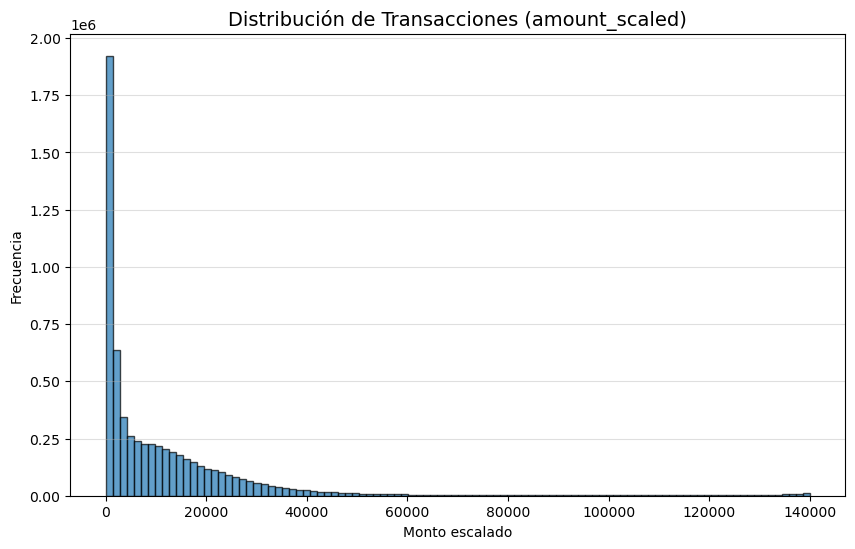

In [122]:
# Histograma simple de amount_scaled
plt.figure(figsize=(10,6))
plt.hist(df['amount_scaled'], bins=100, edgecolor='black', alpha=0.7)
plt.title("Distribución de Transacciones (amount_scaled)", fontsize=14)
plt.xlabel("Monto escalado")
plt.ylabel("Frecuencia")
plt.grid(axis='y', alpha=0.4)
plt.show()

In [123]:
df_tx_scaled = df.copy()

In [124]:
df_tx_scaled.columns

Index(['date', 'CustomerId', 'type', 'amount', 'amount_label', 'type_freq',
       'frequency_label', 'amount_score', 'freq_score', 'tran_score',
       'tran_score_cont', 'tran_label', 'max_tx_cap', 'amount_clipped',
       'amount_ratio', 'amount_scaled'],
      dtype='object')

# <font color='#315aa0'>**Salud del Dataset - Exploración**</font>

## <font color='#c37171'>**Chequeos Generales**</font>

In [125]:
# Clientes
print("Clientes - info general:")
print(df_clients_clean.info())
print(df_clients_clean.describe())

# Transacciones
print("\nTransacciones - info general:")
print(df_tx_scaled.info())
print(df_tx_scaled.describe())

# Chequear duplicados
print("\nDuplicados clientes:", df_clients_clean.duplicated(subset=['CustomerId']).sum())
print("Duplicados transacciones:", df_tx_scaled.duplicated(subset=['CustomerId','date','amount']).sum())

# Chequear missing values
print("\nMissing en clientes:\n", df_clients_clean.isna().sum())
print("\nMissing en transacciones:\n", df_tx_scaled.isna().sum())

Clientes - info general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   RowNumber        10000 non-null  int64         
 1   CustomerId       10000 non-null  int64         
 2   Surname          10000 non-null  object        
 3   CreditScore      10000 non-null  int64         
 4   Geography        10000 non-null  object        
 5   Gender           10000 non-null  object        
 6   Age              10000 non-null  int64         
 7   Tenure           10000 non-null  int64         
 8   Balance          10000 non-null  float64       
 9   NumOfProducts    10000 non-null  int64         
 10  HasCrCard        10000 non-null  int64         
 11  IsActiveMember   10000 non-null  int64         
 12  EstimatedSalary  10000 non-null  float64       
 13  Exited           10000 non-null  int64         
 14  ExitDate      

## <font color='#c37171'>**Distribuciones Numéricas**</font>

In [126]:
# Definir colores
main_color = '#620c0c'
secondary = '#a14b4b'
kde_color = '#FDB860'

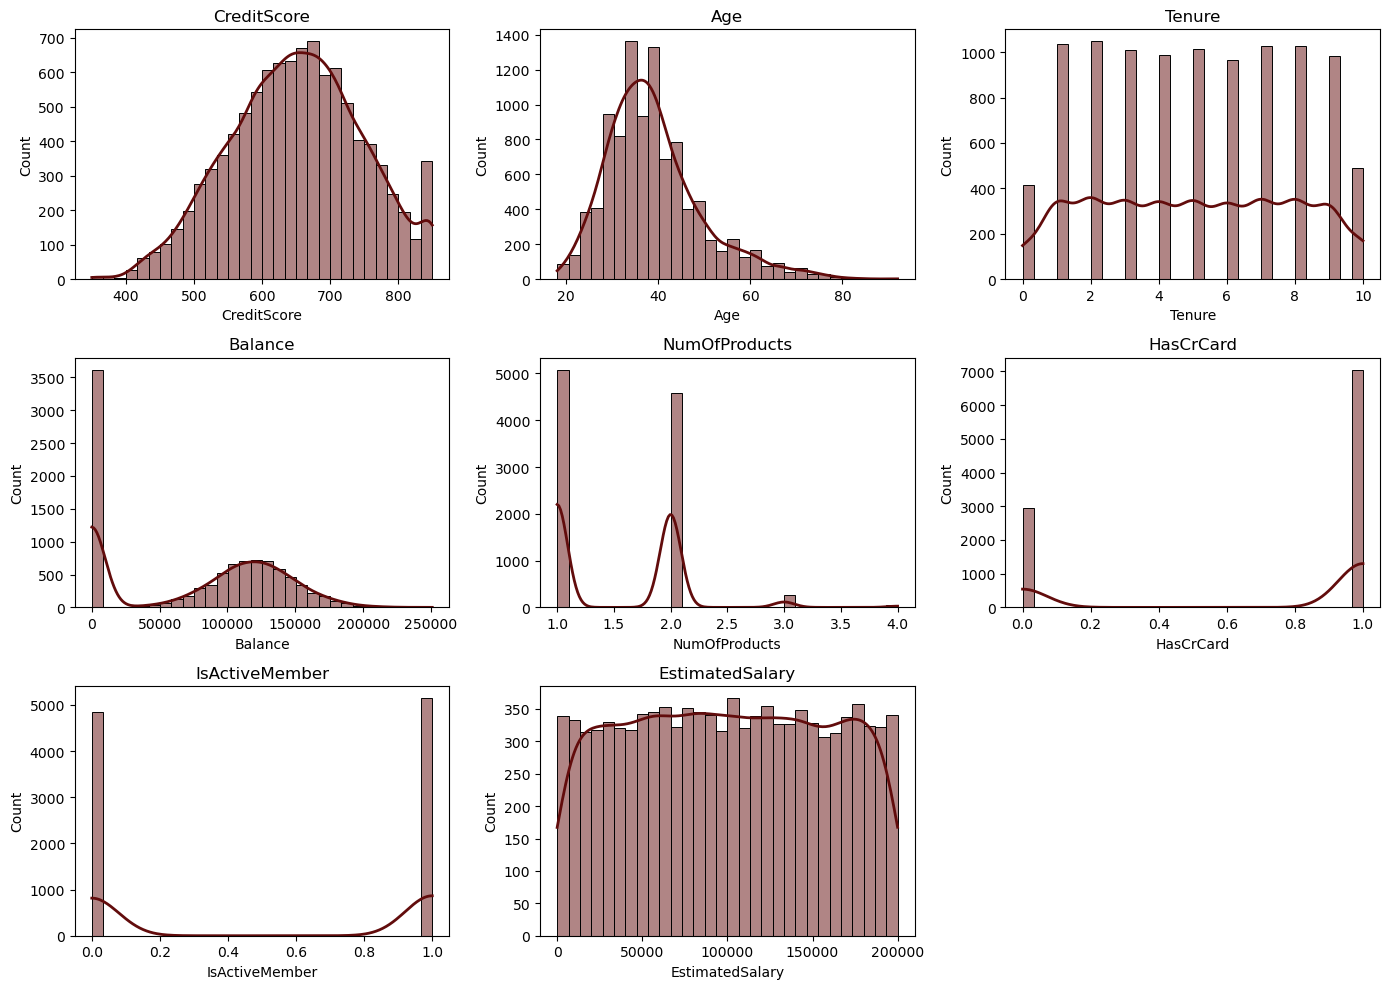

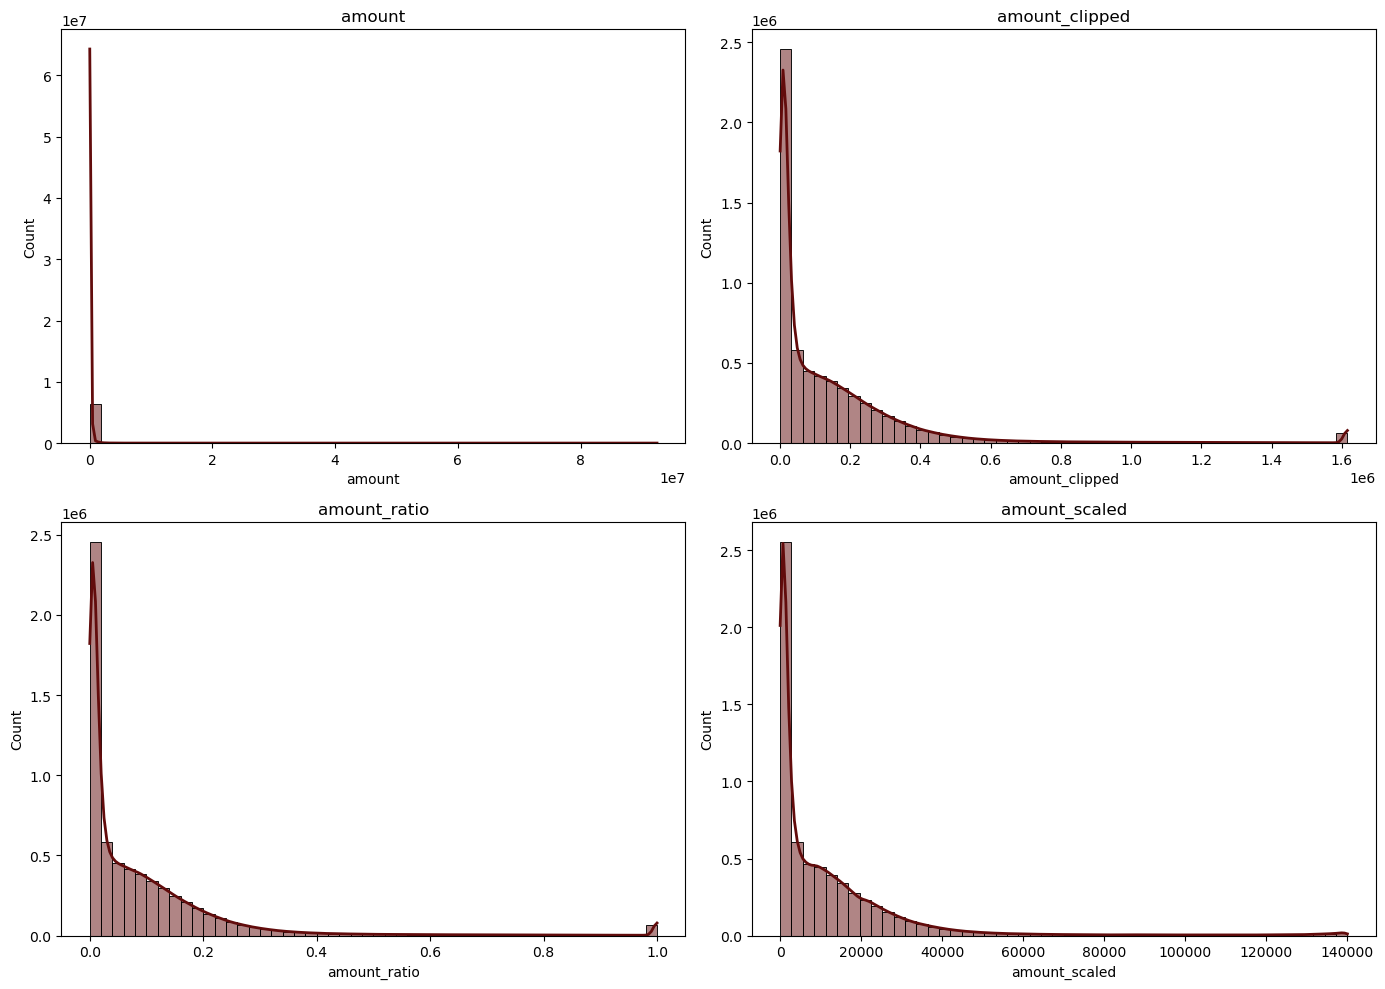

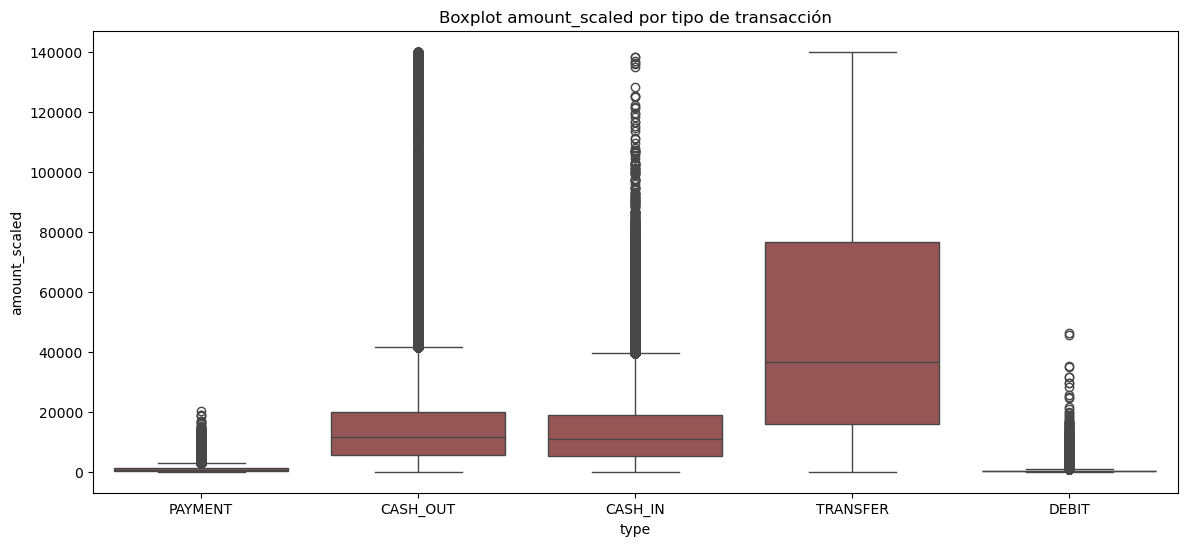

In [128]:
numeric_cols_clients = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
numeric_cols_tx = ['amount','amount_clipped','amount_ratio','amount_scaled']

# Histogramas clientes
plt.figure(figsize=(14,10))
for i,col in enumerate(numeric_cols_clients):
    plt.subplot(3,3,i+1)
    sns.histplot(df_clients_clean[col], bins=30, kde=True,
                 color=main_color,
                 line_kws={'color': kde_color, 'linewidth': 2})
    plt.title(col)
plt.tight_layout()
plt.savefig(os.path.join(IMG_PATH, "df_clients_numerical_dist.png"), dpi=300)
plt.show()

# Histogramas transacciones
plt.figure(figsize=(14,10))
for i,col in enumerate(numeric_cols_tx):
    plt.subplot(2,2,i+1)
    sns.histplot(df_tx_scaled[col], bins=50, kde=True,
                 color=main_color,
                 line_kws={'color': kde_color, 'linewidth': 2})
    plt.title(col)
plt.tight_layout()
plt.savefig(os.path.join(IMG_PATH, "df_tx_scaled_numerical_dist.png"), dpi=300)
plt.show()

# Boxplots
plt.figure(figsize=(14,6))
sns.boxplot(x='type', y='amount_scaled', data=df_tx_scaled, color=secondary)
plt.title("Boxplot amount_scaled por tipo de transacción")
plt.savefig(os.path.join(IMG_PATH, "df_tx_boxplots_amount_scaled.png"), dpi=300)
plt.show()

## <font color='#c37171'>**Churn**</font>

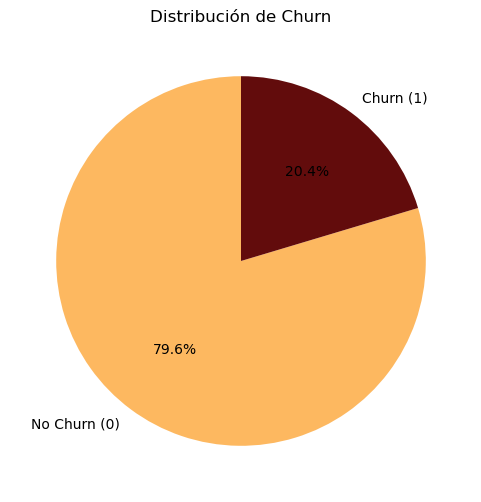

In [129]:
# Pie chart distribución churn
churn_counts = df_clients_clean['Exited'].value_counts(normalize=True)

plt.figure(figsize=(6,6))
colors = [kde_color, main_color]  # Exited=0 → kde_color, Exited=1 → main_color
churn_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors,
                  labels=['No Churn (0)', 'Churn (1)'])
plt.ylabel("")  # quitar etiqueta del eje
plt.title("Distribución de Churn")
plt.savefig(os.path.join(IMG_PATH, "churn_distribution_pie.png"), dpi=300)
plt.show()

## <font color='#c37171'>**Correlación**</font>

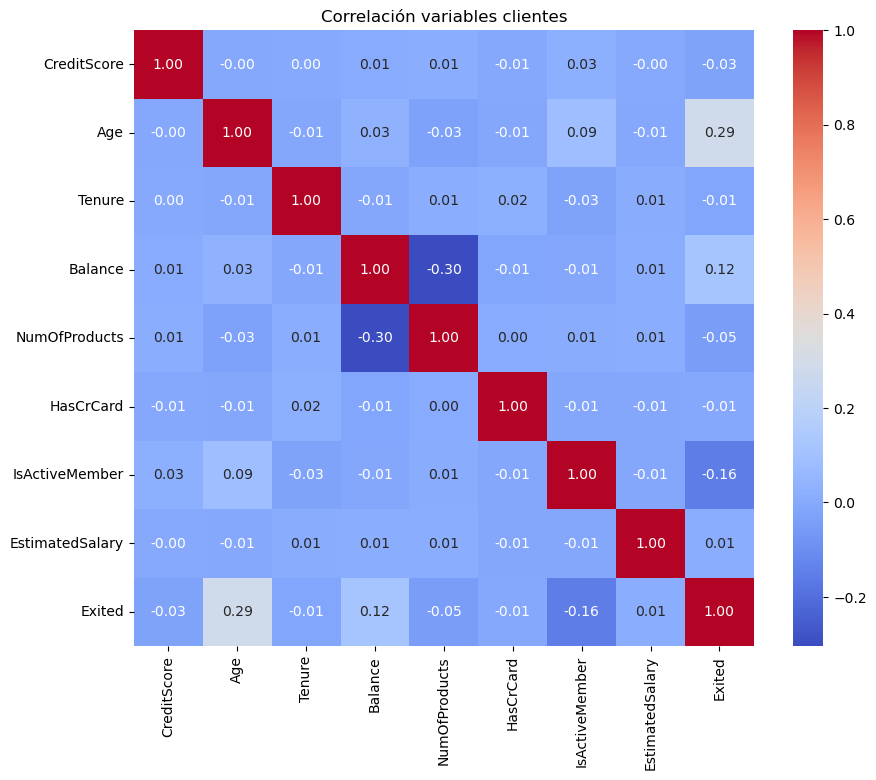

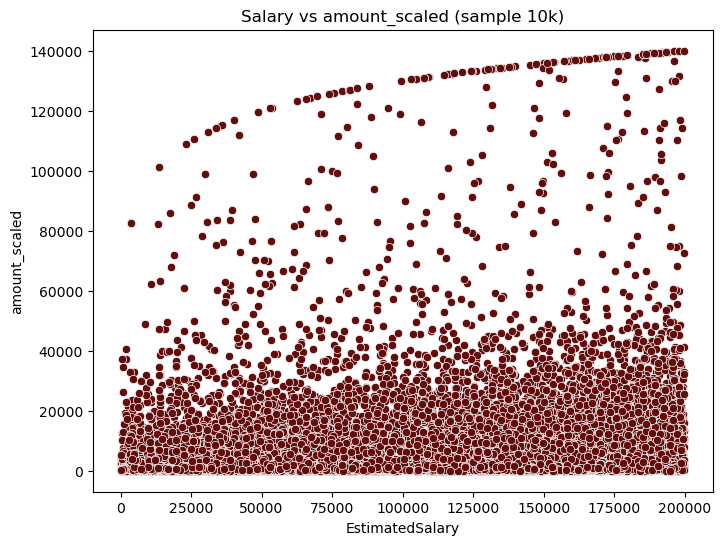

In [130]:
corr_columns = numeric_cols_clients
corr_columns.append('Exited')
plt.figure(figsize=(10,8))
sns.heatmap(df_clients_clean[corr_columns].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlación variables clientes")
plt.savefig(os.path.join(IMG_PATH, "corr_matrix.png"), dpi=300)
plt.show()

# Scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(x='EstimatedSalary', y='amount_scaled',
                data=df_clients_clean.merge(df_tx_scaled, on='CustomerId', how='right').sample(10000),
                color=main_color)
plt.title("Salary vs amount_scaled (sample 10k)")
plt.savefig(os.path.join(IMG_PATH, "scatter_salarios_transacciones.png"), dpi=300)
plt.show()

In [131]:
df_clients_clean.to_csv(DATA_PATH/'clients.csv')

In [132]:
#df_tx_scaled.to_csv(DATA_PATH/'transactions.csv')

# <font color='#315aa0'>**App Interaction Dataset Generation**</font>

In [133]:
start_date

Timestamp('2023-09-19 00:00:00')

In [134]:
import numpy as np
import pandas as pd
from datetime import datetime
import uuid

# reproducibilidad
RNG = np.random.default_rng(42)

freq = "M"  # meses
months = pd.period_range(start=start_date, end=end_date, freq=freq).to_timestamp('M')

# nombres de clusters según tu df_clients
clusters = [
    "Nuevos - Poco Valor",
    "Clientes potenciales",
    "Standard",
    "Valioso - Bajo compromiso",
    "VIP"
]

# parámetros base por cluster (ejemplo; ajustalos)
cluster_params = {
    "Nuevos - Poco Valor": {
        "base_sessions_per_month": 1.5,
        "duration_mu": 2.0,  # log-normal mu
        "duration_sigma": 0.6,
        "p_transfer": 0.02,
        "p_payment": 0.05,
        "p_invest": 0.01,
        "p_push_open": 0.10,
        "p_failed_login": 0.01,
    },
    "Clientes potenciales": {
        "base_sessions_per_month": 3.0,
        "duration_mu": 2.3,
        "duration_sigma": 0.7,
        "p_transfer": 0.06,
        "p_payment": 0.08,
        "p_invest": 0.02,
        "p_push_open": 0.15,
        "p_failed_login": 0.02,
    },
    "Standard": {
        "base_sessions_per_month": 4.0,
        "duration_mu": 2.7,
        "duration_sigma": 0.8,
        "p_transfer": 0.10,
        "p_payment": 0.12,
        "p_invest": 0.03,
        "p_push_open": 0.18,
        "p_failed_login": 0.03,
    },
    "Valioso - Bajo compromiso": {
        "base_sessions_per_month": 3.5,
        "duration_mu": 2.6,
        "duration_sigma": 0.8,
        "p_transfer": 0.12,
        "p_payment": 0.10,
        "p_invest": 0.05,
        "p_push_open": 0.12,
        "p_failed_login": 0.02,
    },
    "VIP": {
        "base_sessions_per_month": 8.0,
        "duration_mu": 3.0,
        "duration_sigma": 0.9,
        "p_transfer": 0.25,
        "p_payment": 0.20,
        "p_invest": 0.15,
        "p_push_open": 0.35,
        "p_failed_login": 0.01,
    }
}

# churn params
last_n_months_decay = 6       # ventana de decadencia antes de exit
decay_final_frac = 0.05      # en la fecha de exit la actividad se reduce hasta este frac (5%)

# tenure weighting
tenure_max = df_clients['Tenure'].max()
tenure_weight = 0.5   # cuánto influye Tenure en la tasa (0..1)

# ---------- 1) Preparar base cliente x mes ----------
clients = df_clients[['CustomerId','cluster_label','Exited','ExitDate','Tenure']].copy()
clients['Tenure'] = clients['Tenure'].astype(float)

# crear cartesian product cliente x mes (vectorizado) — ojo con memoria si hay muchísimos clientes/meses
cust_ids = clients['CustomerId'].values
n_cust = len(cust_ids)
n_months = len(months)
# generamos DataFrame "grid" Cliente-Mes
grid = pd.DataFrame({
    'CustomerId': np.repeat(cust_ids, n_months),
    'month': np.tile(months.to_numpy(), n_cust)
})
# merge valores cliente
grid = grid.merge(clients, on='CustomerId', how='left')

# ---------- 2) calcular tasa (lambda) por cliente-mes ----------
def compute_lambda_row(row):
    params = cluster_params.get(row['cluster_label'], cluster_params['Standard'])
    base = params['base_sessions_per_month']
    tenure_factor = (row['Tenure'] / tenure_max) * tenure_weight  # 0..tenure_weight
    lam = base * (1 + tenure_factor)
    # churn decay: si cliente exited, y mes está en los últimos W meses before exit, reducir
    if row['Exited'] == 1 and pd.notna(row.get('ExitDate')):
        exit_date = pd.to_datetime(row['ExitDate'])
        # if grid month is after exit -> lambda = 0
        month_end = row['month'] + pd.offsets.MonthEnd(0)
        if month_end >= exit_date:
            return 0.0
        # months_before_exit: 0 = same month as exit-1?
        months_before = int(((exit_date.to_period('M') - row['month'].to_period('M')).n))
        # apply linear decay in last_n_months_decay months
        if months_before <= last_n_months_decay:
            frac = months_before / float(last_n_months_decay)  # 0..1 far from exit
            # near exit months_before small -> frac small -> reduce
            lam = lam * (decay_final_frac + (1 - decay_final_frac) * frac)
    return lam

# vectorizar compute_lambda_row con apply on grid — es razonable porque grid size = n_cust * n_months.
# Si demasiada lenta -> podemos optimizar, pero para 10k*24 ~ 240k filas es OK.
grid['lambda'] = grid.apply(compute_lambda_row, axis=1)

# ---------- 3) samplear número de sesiones por cliente-mes ----------
# usar Poisson
grid['n_sessions'] = RNG.poisson(grid['lambda'].values)

# eliminar filas con n_sessions == 0 para ahorrar memoria
grid = grid[grid['n_sessions'] > 0].reset_index(drop=True)

# ---------- 4) expandir a nivel de sesión (vectorizado) ----------
# repetimos CustomerId y month según n_sessions
rep_counts = grid['n_sessions'].values
total_sessions = rep_counts.sum()
print("Total sesiones generadas:", total_sessions)

session_customer = np.repeat(grid['CustomerId'].values, rep_counts)
session_month = np.repeat(grid['month'].values.astype('datetime64[ns]'), rep_counts)

# ---------- 5) generar propiedades por sesión ----------
# obtener cluster params per session by merging or mapping
cust_to_cluster = clients.set_index('CustomerId')['cluster_label'].to_dict()
session_cluster = np.vectorize(cust_to_cluster.get)(session_customer)

# durations: lognormal with params by cluster
mu_map = {k: v['duration_mu'] for k,v in cluster_params.items()}
sigma_map = {k: v['duration_sigma'] for k,v in cluster_params.items()}
mu_arr = np.vectorize(mu_map.get)(session_cluster)
sigma_arr = np.vectorize(sigma_map.get)(session_cluster)

# sample duration in minutes
durations = RNG.lognormal(mean=mu_arr, sigma=sigma_arr)
# clip duration to reasonable bounds
durations = np.clip(durations, 0.5, 180.0)  # entre 30 segundos y 3 horas

# features per session: bernoulli with p depending on cluster
p_transfer = np.vectorize(lambda cl: cluster_params[cl]['p_transfer'])(session_cluster)
p_payment  = np.vectorize(lambda cl: cluster_params[cl]['p_payment'])(session_cluster)
p_invest   = np.vectorize(lambda cl: cluster_params[cl]['p_invest'])(session_cluster)
p_push     = np.vectorize(lambda cl: cluster_params[cl]['p_push_open'])(session_cluster)
p_fail     = np.vectorize(lambda cl: cluster_params[cl]['p_failed_login'])(session_cluster)

used_transfer = RNG.random(total_sessions) < p_transfer
used_payment  = RNG.random(total_sessions) < p_payment
used_invest   = RNG.random(total_sessions) < p_invest
opened_push   = RNG.random(total_sessions) < p_push
failed_login  = RNG.random(total_sessions) < p_fail

# session dates uniformly in month (vectorized)
# month_start and month_end arrays
month_starts = pd.to_datetime(session_month) - pd.offsets.MonthEnd(0) + pd.offsets.MonthBegin(0)
# but easier: get first day of month
month_starts = pd.to_datetime(session_month).to_period('M').to_timestamp()
month_ends = (pd.to_datetime(session_month).to_period('M') + 1).to_timestamp() - pd.Timedelta(days=1)
# sample integer days offset
days_in_month = (month_ends - month_starts).days + 1
rand_days = RNG.integers(0, days_in_month, size=total_sessions)
session_dates = month_starts + pd.to_timedelta(rand_days, unit='D')

# create session_id (uuid or simple incremental)
session_ids = np.arange(total_sessions).astype(str)

# assemble event-level DataFrame
df_sessions = pd.DataFrame({
    'session_id': session_ids,
    'CustomerId': session_customer,
    'cluster_label': session_cluster,
    'date': session_dates,
    'duration_min': durations,
    'used_transfer': used_transfer.astype(int),
    'used_payment': used_payment.astype(int),
    'used_invest': used_invest.astype(int),
    'opened_push': opened_push.astype(int),
    'failed_login': failed_login.astype(int)
})

# ---------- 6) Agregados por cliente (puedes agregar month-level o global) ----------
# month-level
df_sessions['month'] = df_sessions['date'].dt.to_period('M').dt.to_timestamp()
agg = df_sessions.groupby(['CustomerId','month']).agg(
    num_sessions = ('session_id','count'),
    total_duration = ('duration_min','sum'),
    avg_session_duration = ('duration_min','mean'),
    pct_transfer = ('used_transfer','mean'),
    pct_payment  = ('used_payment','mean'),
    pct_invest   = ('used_invest','mean'),
    pct_push_open = ('opened_push','mean'),
    n_failed_logins = ('failed_login','sum'),
    last_session = ('date','max')
).reset_index()

# add days_since_last_login relative to global end_date
agg['days_since_last_login'] = (pd.to_datetime(end_date) - agg['last_session']).dt.days

# ---------- 7) Agregados por cliente global (features ML)
customer_features = agg.groupby('CustomerId').agg(
    total_sessions = ('num_sessions','sum'),
    mean_sessions_per_month = ('num_sessions','mean'),
    median_session_duration = ('avg_session_duration','median'),
    pct_sessions_with_transfer = ('pct_transfer','mean'),
    total_failed_logins = ('n_failed_logins','sum'),
    months_active = ('month','nunique'),
    last_session_date = ('last_session','max')
).reset_index()

# optional: merge back cluster and Exited
customer_features = customer_features.merge(df_clients[['CustomerId','cluster_label','Exited','Tenure']], on='CustomerId', how='left')

# ---------- 8) Validaciones (resumen rápido) ----------
print("Sesiones totales:", len(df_sessions))
print("Clientes con >=1 session:", customer_features.shape[0])
print(customer_features.groupby('cluster_label')['total_sessions'].describe(percentiles=[0.25,0.5,0.75]).head())

# Guardar
# df_sessions.to_parquet("app_sessions.parquet")
# customer_features.to_parquet("app_features.parquet")


Total sesiones generadas: 1053341
Sesiones totales: 1053341
Clientes con >=1 session: 9982
                            count        mean        std  min    25%    50%  \
cluster_label                                                                 
Clientes potenciales       2642.0   87.919758  18.412549  1.0   78.0   88.0   
Nuevos - Poco Valor        1433.0   43.191207   9.926462  1.0   37.0   43.0   
Standard                   2867.0  118.414370  26.815019  1.0  105.0  121.0   
VIP                         814.0  229.581081  58.330147  1.0  201.0  238.0   
Valioso - Bajo compromiso  2226.0  104.578167  24.826199  1.0   94.0  108.0   

                             75%    max  
cluster_label                            
Clientes potenciales       100.0  146.0  
Nuevos - Poco Valor         49.0   77.0  
Standard                   136.0  190.0  
VIP                        270.0  332.0  
Valioso - Bajo compromiso  121.0  169.0  


In [135]:
df_sessions

,session_id,CustomerId,cluster_label,date,duration_min,used_transfer,used_payment,used_invest,opened_push,failed_login,month
0,0,15634602,Clientes potenciales,2023-09-30,4.419845,0,0,0,0,0,2023-09-01
1,1,15634602,Clientes potenciales,2023-09-29,8.149516,0,0,0,0,0,2023-09-01
2,2,15634602,Clientes potenciales,2023-09-12,5.608568,0,0,0,0,0,2023-09-01
3,3,15634602,Clientes potenciales,2023-09-24,11.139346,0,0,0,0,0,2023-09-01
4,4,15634602,Clientes potenciales,2023-10-06,17.142917,0,1,0,0,0,2023-10-01
...,...,...,...,...,...,...,...,...,...,...,...
1053336,1053336,15628319,Nuevos - Poco Valor,2025-07-11,2.179658,0,0,0,0,0,2025-07-01
1053337,1053337,15628319,Nuevos - Poco Valor,2025-08-03,7.846555,0,0,0,0,0,2025-08-01
1053338,1053338,15628319,Nuevos - Poco Valor,2025-08-11,12.748405,0,0,0,0,0,2025-08-01
1053339,1053339,15628319,Nuevos - Poco Valor,2025-09-30,8.039932,0,0,0,0,0,2025-09-01


In [136]:
customer_features

,CustomerId,total_sessions,mean_sessions_per_month,median_session_duration,pct_sessions_with_transfer,total_failed_logins,months_active,last_session_date,cluster_label,Exited,Tenure
0,15565701,130,5.200000,16.873507,0.143413,1,25,2025-09-23,Valioso - Bajo compromiso,0,9
1,15565706,26,1.857143,8.346947,0.000000,1,14,2025-01-01,Nuevos - Poco Valor,1,1
2,15565714,106,4.240000,15.352259,0.046492,1,25,2025-09-29,Standard,0,1
3,15565779,114,4.750000,12.107266,0.077546,6,24,2025-09-27,Clientes potenciales,0,6
4,15565796,152,6.080000,18.392178,0.114095,3,25,2025-09-28,Standard,0,10
...,...,...,...,...,...,...,...,...,...,...,...
9977,15815628,107,4.280000,11.432043,0.070476,3,25,2025-09-30,Clientes potenciales,0,8
9978,15815645,272,10.880000,29.551093,0.286006,3,25,2025-09-29,VIP,0,8
9979,15815656,225,10.227273,29.666906,0.236596,2,22,2025-06-19,VIP,1,9
9980,15815660,72,3.272727,9.755178,0.045455,2,22,2025-08-31,Clientes potenciales,0,1


In [137]:
df_sessions.to_csv(DATA_PATH/'app_sessions.csv')

In [138]:
customer_features.to_csv(DATA_PATH/'client_app_features.csv')